# DSC 550 

### Term Paper:  Chocolate!

Author: Kimberly Cable<br>
Term: Summer, 2022

## Milestone 1: Data Selection and EDA

### About:

Chocolate.  Who doesn't like it? It's been around since the 19th century BCE.  But what makes chocolate highly desirable?  In this study, I hope to gain that insight.

### References

Manhattan Chocolate Society, Flavors of Cacao [Internet]. Available from: http://flavorsofcacao.com/

### Plan of Attack:

Chocolate is loved by many worldwide.  But what makes good chocolate?  Chocolatiers, home cooks, and lovers of chocolate eat, use and make chocolate.  Knowing where to get good chocolate could make or break a recipe or even a good relationship.

The data I will use comes from the Flavors of Cacao website and their Chocolate Bar Ratings table. The data includes features such as cocoa content, where it was made, bean origin, the number of ingredients, and its characteristics and rating. I will also get the USA Craft Makers table and merge it with the Chocolate Bar Ratings to look more closely at the US Chocolate Companies.

I plan to look to see if I can predict the ratings for chocolate in the US and see if any features play a part in good chocolate. 

I will look at questions such as:
* Which states have the best chocolate?
* Which ingredients make the best chocolate?
* How much cocoa makes for good chocolate?
* What are the key characteristics of good chocolate?

I do not see any major ethical implications for my study, but it does have subjective attributes that some may disagree with.

Some of the challenges I see are cleaning the dataset and separating out some of the columns. Also, the model building may be a challenge as I have never used many categorical methods before.


### Data Dictionary:

**Chocolate Bar Ratings**

1. **REF:** Reference number
2. **Company(Manufacturer):** Company that made the chocolate
3. **Company Location:** Location of the Company (country)
4. **Review Date:** Year the chocolate was reviewed
5. **Country of Bean Origin:** Country the bean originated in
6. **Specific Bean Origin or Bar Name:** Specifics of the bean origin and/or batch
7. **Cocoa Percent:** Percentage of cocoa in chocolate
8. **Ingredients:** Number and ingredients
        - B: Beans
        - S: Sugar
        - S*: Sweetener other than white cane or beet sugar
        - C: Cocoa Butter
        - V: Vanilla
        - L: Lecithin
        - Sa: Salt
9. **Most Memorable Characteristics:** A summary review of the most memorable characteristics of that bar.
10. **Rating:** Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch.
    * **Rating Scale**
        - 4.0 - 5.0   = Outstanding
        - 3.5 - 3.9   = Highly Recommended
        - 3.0 - 3.49 = Recommended
        - 2.0 - 2.9   = Disappointing
        - 1.0 - 1.9   = Unpleasant

**USA Craft Makers**

1. **COMPANY NAME**: Company that made the chocolate
2. **CITY**: Company's city location
3. **STATE**: Company's state of location
4. **OWNER/MAKER**: Owner or maker of the chocolate

### Libraries Needed

1. pandas
2. matplotlib
3. numpy
4. seaborn
5. wordcloud

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

### Read Chocolate Ratings dataset

In [2]:
# Read dataset
try:
    chocolate_df = pd.read_excel("Chocolate Ratings.xlsx")
except Exception:
    print("There was an error reading the Chocolate Ratings file")
    
chocolate_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


### Read USA Craft Makers dataset

In [3]:
# Read dataset
try:
    usa_companies_df = pd.read_excel("USA Companies.xlsx")
except Exception:
    print("There was an error reading the USA Companies file")
    
usa_companies_df.head()

,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,Acalli (closed),Gretna,Louisiana,Carol Morse
2,Adalee,Eagle Mountain,Utah,NaN
3,Adams Chocolate,Nyack,New York,Adam Berrios
4,Affinity,Sugar Land,Texas,Chris Campbell


### Get preliminary information about Chocolate Ratings dataset

In [4]:
# Shape
chocolate_df.shape

(2588, 10)

There are 2,588 chocolate rating observations and 10 columns

In [5]:
# Information on features
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   float64
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 202.3+ KB


**Conclusions:**

* There is a mix of numeric and categorical data, the majority being categorical.
* The target variable will be the rating as the best chocolates have a highly recommended rating and above
    * 4.0 - 5.0: Outstanding
    * 3.5 - 3.9: Highly Recommended
    * 3.0 - 3.49: Recommended
    * 2.0 - 2.9: Disappointing
    * 1.0 - 1.9: Unpleasant
* Some features will not be useful like REF.

In [6]:
# Get summary statstics on numerical data
chocolate_df.describe()

,REF,Review Date,Cocoa Percent,Rating
count,2588.000000,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,0.716130,3.198319
std,773.852201,4.082722,0.055771,0.444069
min,5.000000,2006.000000,0.420000,1.000000
25%,820.000000,2012.000000,0.700000,3.000000
50%,1470.000000,2015.000000,0.700000,3.250000
75%,2122.000000,2018.000000,0.740000,3.500000
max,2768.000000,2022.000000,1.000000,4.000000


In [7]:
# Get summary statistics on non-numerical data
chocolate_df.describe(include = ['O'])

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Ingredients,Most Memorable Characteristics
count,2588,2588,2588,2588,2501,2588
unique,593,65,63,1643,21,2545
top,Soma,U.S.A.,Venezuela,Madagascar,"3- B,S,C","spicy, cocoa"
freq,57,1168,254,56,1029,4


### Get preliminary information about USA Craft Makers dataset

In [8]:
# Shape
usa_companies_df.shape

(337, 4)

In [9]:
# Information on features
usa_companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COMPANY NAME  337 non-null    object
 1   CITY          337 non-null    object
 2   STATE         337 non-null    object
 3   OWNER/MAKER   331 non-null    object
dtypes: object(4)
memory usage: 10.7+ KB


In [10]:
# Get summary statistics on non-numerical data
usa_companies_df.describe(include = ['O'])

,COMPANY NAME,CITY,STATE,OWNER/MAKER
count,337,337,337,331
unique,337,242,49,329
top,5150 Chocolate Co.,New York,California,Joshua Parker
freq,1,14,47,2


**Conclusions:**

* There is only categorical data.
* Some features will not be useful like Owner/Maker.

### Split Chocolate Ratings dataset into USA and Rest

In [11]:
chocolate_usa_df = chocolate_df[chocolate_df['Company Location'] == 'U.S.A.']
chocolate_rest_df = chocolate_df[chocolate_df['Company Location'] != 'U.S.A.']

In [12]:
chocolate_usa_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [13]:
chocolate_usa_df.shape

(1168, 10)

* There are 1168 chocolates from the USA

In [14]:
chocolate_rest_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
7,797,A. Morin,France,2012,Bolivia,Bolivia,0.70,"4- B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,0.63,"4- B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,0.70,"4- B,S,C,L","brief fruit note, earthy, nutty",2.75
10,1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",0.70,"4- B,S,C,L","sticky, red fruit, sour",3.00
11,1011,A. Morin,France,2013,Brazil,Brazil,0.70,"4- B,S,C,L",mild tobacco,3.25


In [15]:
chocolate_rest_df.shape

(1420, 10)

* There are 1420 chocolate not from the USA

### Merge USA Chocolate Ratings with USA Companies Dataset

In [16]:
from fuzzywuzzy import process

# Loop through the Chocolate Ratings dataframe and get matches from the Companies Dataframe on company names
companies = usa_companies_df['COMPANY NAME'].tolist()
chocolate_usa_df['matches'] = chocolate_usa_df['Company (Manufacturer)'].apply(lambda x: process.extractOne(str(x), companies))

chocolate_usa_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_21856\200170014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_usa_df['matches'] = chocolate_usa_df['Company (Manufacturer)'].apply(lambda x: process.extractOne(str(x), companies))


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)"
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)"
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)"
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)"
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)"


In [17]:
# pull out company name in matches column and make company column
chocolate_usa_df['company'] = chocolate_usa_df['matches'].apply(lambda x: x[0])

chocolate_usa_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_21856\4173370801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_usa_df['company'] = chocolate_usa_df['matches'].apply(lambda x: x[0])


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.


In [18]:
# Merge datasets based on company columns
chocolate_usa = pd.merge(chocolate_usa_df, usa_companies_df, how = "left", left_on = "company", right_on = "COMPANY NAME")

chocolate_usa.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz


In [19]:
# Get final summary statistics on numerical data
chocolate_usa.describe()

,REF,Review Date,Cocoa Percent,Rating
count,1168.000000,1168.000000,1168.000000,1168.000000
mean,1581.836473,2015.238014,0.715398,3.195634
std,749.749028,3.946497,0.047287,0.422734
min,5.000000,2006.000000,0.550000,1.500000
25%,1002.000000,2012.000000,0.700000,3.000000
50%,1554.000000,2015.000000,0.700000,3.250000
75%,2262.000000,2018.000000,0.740000,3.500000
max,2768.000000,2022.000000,1.000000,4.000000


In [20]:
# Get final summary statistics on non-numerical data
chocolate_usa.describe(include = ['O'])

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Ingredients,Most Memorable Characteristics,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
count,1168,1168,1168,1168,1150,1168,1168,1168,1168,1168,1168,1166
unique,258,1,39,790,17,1157,250,227,227,167,40,225
top,Fresco,U.S.A.,Dominican Republic,Dominican Republic,"2- B,S","sandy, sweet","(Fresco, 100)",Fresco,Fresco,San Francisco,California,Rob Anderson
freq,39,1168,162,26,461,3,39,39,39,66,236,39


### Graphical Analysis

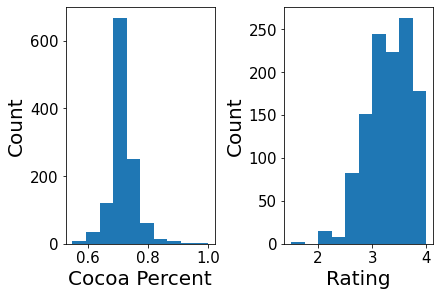

In [21]:
# Create histograms of numerical data

# Create figure
fig, axes = plt.subplots(1, 2, layout = 'constrained')

# Specify features interested in
num_features = ['Cocoa Percent', 'Rating']
x_axes = num_features
y_axes = ['Count', 'Count']

# Create histograms
axes = np.ravel(axes)

for idx, ax in enumerate(axes):
    ax.hist(chocolate_usa[num_features[idx]].dropna(), bins = 10)
    ax.set_xlabel(x_axes[idx], fontsize = 20)
    ax.set_ylabel(y_axes[idx], fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 15)
    
plt.show()

**Conclusions:**

Cocoa Percent appears to be a normal distribution but Rating is heavily skewed left.

In [22]:
# Bar charts of some of the categorical features

#create a copy of the data frame for use with graphing
chocolate_plots = chocolate_usa.copy()

In [23]:
# Convert Ratings to ranking
chocolate_plots.loc[chocolate_plots.Rating <= 5, 'Rank'] = 'Outstanding'
chocolate_plots.loc[chocolate_plots.Rating <= 3.9, 'Rank'] = 'Highly Recommended'
chocolate_plots.loc[chocolate_plots.Rating <= 3.49, 'Rank'] = 'Recommended'
chocolate_plots.loc[chocolate_plots.Rating <= 2.9, 'Rank'] = 'Disappointing'
chocolate_plots.loc[chocolate_plots.Rating <= 1.9, 'Rank'] = 'Unpleasant'

chocolate_plots.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER,Rank
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Recommended
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Recommended
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended


In [24]:
# Count of Ratings in the US
ratings_counts = chocolate_plots['Rank'].value_counts()

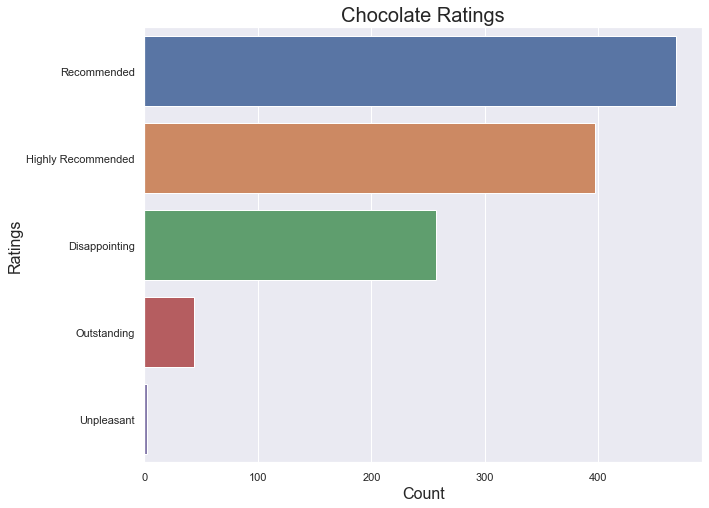

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(y = ratings_counts.index, x = ratings_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('Ratings', fontsize = 16)
ax.set_title('Chocolate Ratings', fontsize = 20)
plt.show()

**Conclusions:**

* There are more Recommended and Highly Recommended chocolates with minimal Outstanding and Unpleasant.

In [26]:
# Count of locations (State) of chocolate makers
companies_counts = chocolate_plots['STATE'].value_counts()

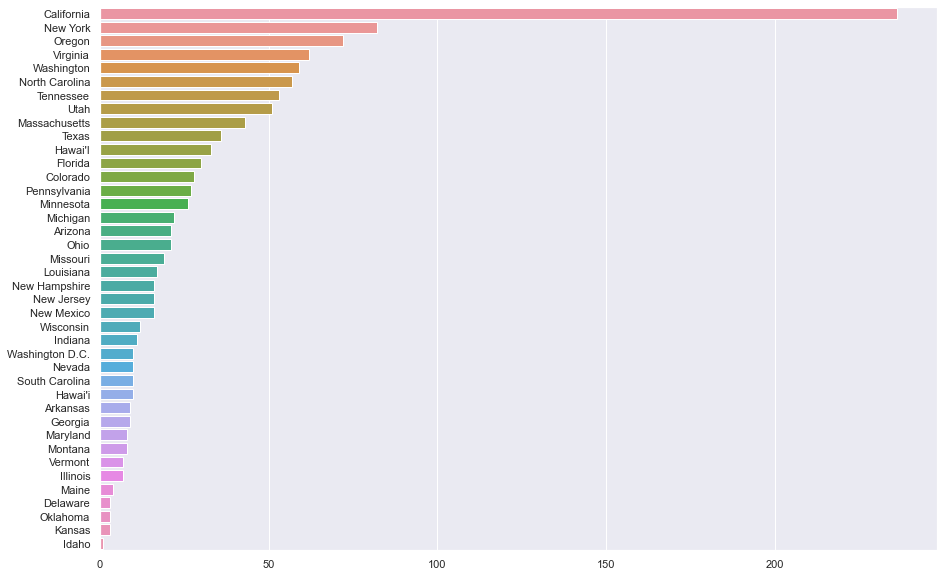

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
x = sns.barplot(y = companies_counts.index, x = companies_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('State', fontsize = 16)
ax.set_title('State Location of Chocolate Makers', fontsize = 20)
plt.show()

**Conclusions:**

* There are significantly more companies from the California then the rest of the states.

In [28]:
# Count of Country of Bean Origin
origin_counts = chocolate_plots['Country of Bean Origin'].value_counts()

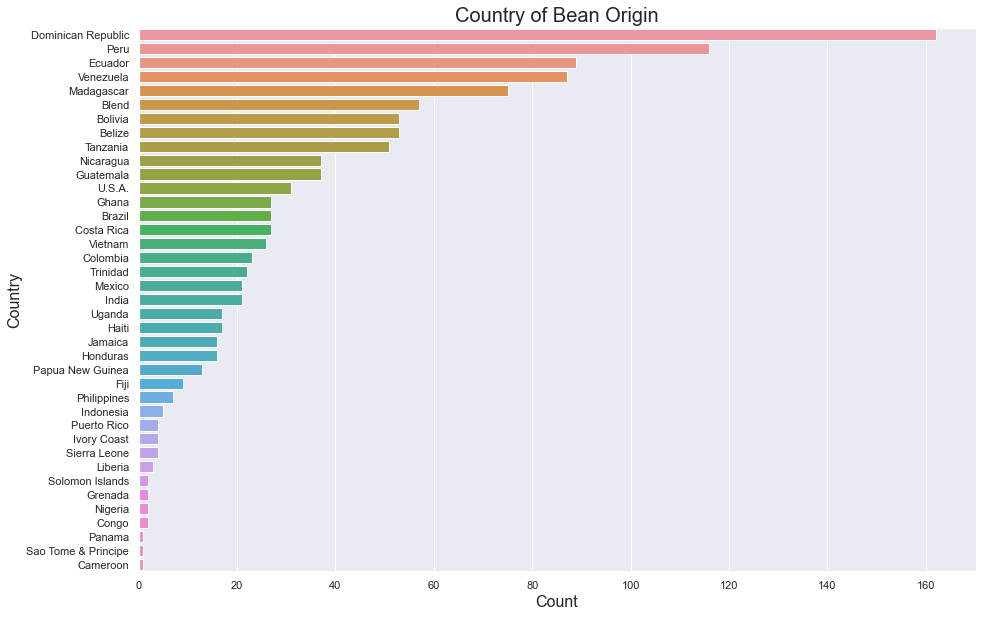

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(y = origin_counts.index, x = origin_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('Country', fontsize = 16)
ax.set_title('Country of Bean Origin', fontsize = 20)
plt.show()

**Conclusions:**
* Dominican Republic, Peru, Ecuador, and Venezula are the top producers of cacao beans used in US companies making chocolates.

In [30]:
# Count of Ingredients
ingredients_counts = chocolate_plots['Ingredients'].value_counts()

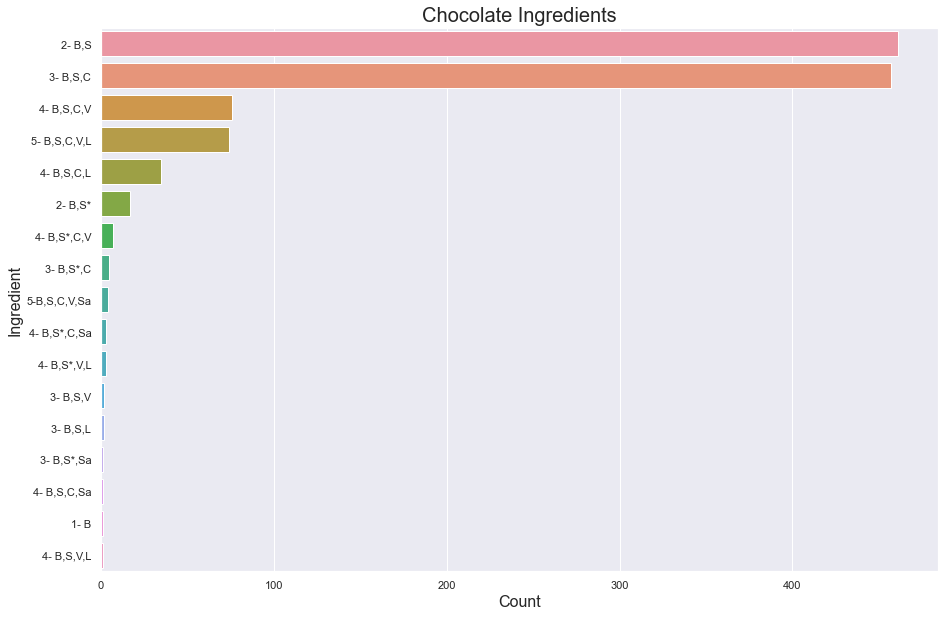

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(y = ingredients_counts.index, x = ingredients_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('Ingredient', fontsize = 16)
ax.set_title('Chocolate Ingredients', fontsize = 20)
plt.show()

**Conclusions**

Most of the chocolate is made with 2 ingredients (Butter and Sugar) and 3 ingredients (Butter, Sugar, and Cocoa Butter).

(-0.5, 1599.5, 799.5, -0.5)

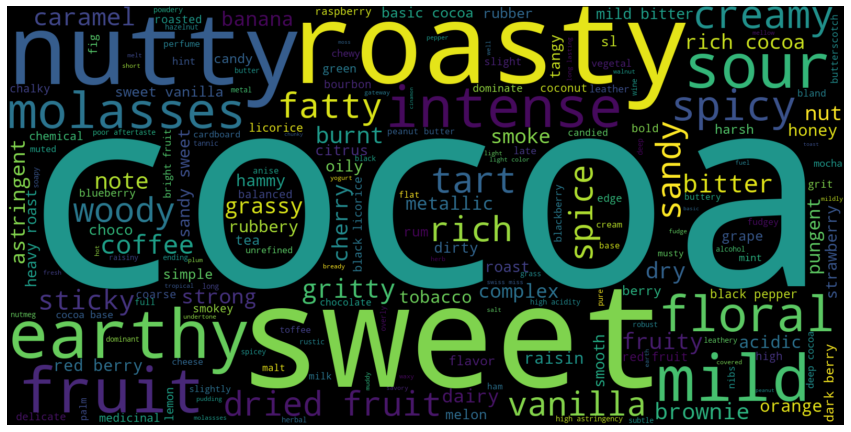

In [32]:
# Most frequent words in the Characteristics

word_string = " ".join(chocolate_usa['Most Memorable Characteristics'].str.lower())

plt.figure(figsize=(15,15))

word_cloud = WordCloud(background_color = "black", width=1600, height=800)
word_cloud.generate(word_string)

plt.imshow(word_cloud.recolor(colormap = 'viridis' , random_state = 17), interpolation="bilinear")
plt.axis('off')

**Conclusions:**
* Not looking at the other features, it looks like cocoa, sweet, nutty and roasty seem to characterize most frequently about the company's chocolate the most.

**Final Milestone 1 Conclusion**

* We will be looking at 1,168 chocolates from the USA
    * 39 unique Bean origins
    * 17 unique Ingredients (combinations)
    * 40 different States
    * 167 different Cities
    * 227 unique Companies
* Just looking at the United States chocolatiers, most of the chocolates are rated fairly high with most made in California. 
* Dominican Republic and Peru also seem to initially be the beans of choice.
* Further analysis needs to be done with correlations between the features and breaking down some of the features to further look into what makes a good chocolate.  
* If I have time it would be interesting to compare US companies with the rest of the world.

## Milestone 2: Data Preparation

In [33]:
# Examine first 5 rows
chocolate_usa.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz


In [34]:
chocolate_usa.shape

(1168, 16)

### Step 1: Drop columns not needed

* REF: row id, not needed for model
* Company (Manufacturer): Duplicate column of 'company'
* Company Location: dataframe is all USA so it is no longer needed
* Matches: no longer needed
* COMPANY NAME: duplicate column of 'company'
* OWNER/MAKER: Not needed for model

In [35]:
chocolate_usa_cleaned = chocolate_usa.drop(['REF', 'Company (Manufacturer)', 'Company Location', 'matches', 'COMPANY NAME', 'OWNER/MAKER'],
                                           axis = 1)

chocolate_usa_cleaned.head()

,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,company,CITY,STATE
0,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,5150 Chocolate Co.,Delray Beach,Florida
1,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,5150 Chocolate Co.,Delray Beach,Florida
2,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,5150 Chocolate Co.,Delray Beach,Florida
3,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,5150 Chocolate Co.,Delray Beach,Florida
4,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,5150 Chocolate Co.,Delray Beach,Florida


### Step 2: Check for empty rows

In [36]:
chocolate_usa_cleaned.isnull().sum()

Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         18
Most Memorable Characteristics       0
Rating                               0
company                              0
CITY                                 0
STATE                                0
dtype: int64

In [37]:
# Since you can't make up ingredients, I will drop the 18 rows with empty ingredients
chocolate_usa_cleaned = chocolate_usa_cleaned.dropna()
chocolate_usa_cleaned.isnull().sum()

Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
company                             0
CITY                                0
STATE                               0
dtype: int64

In [38]:
chocolate_usa_cleaned.shape

(1150, 10)

### Step 3: Standardized ratings to their ranks

Ratings are based on the following chart:
* 4.0 - 5.0 = Outstanding
* 3.5 - 3.9 = Highly Recommended
* 3.0 - 3.49 = Recommended
* 2.0 - 2.9 = Disappointing
* 1.0 - 1.9 = Unpleasant

I will convert the current rating to a 5, 4, 3.5, 3, 2 rating scale to match up with the ranks

In [39]:
def convert_rating(rating):
        if rating <= 1.9:
            return 2
        elif rating <= 2.9:
            return 3
        elif rating <= 3.49:
            return 3.5
        elif rating <= 3.9:
            return 4
        else:
            return 5

In [40]:
chocolate_usa_cleaned.loc[:,'rating_rank'] = chocolate_usa_cleaned.loc[:,'Rating'].apply(convert_rating)

chocolate_usa_cleaned.head()

,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,company,CITY,STATE,rating_rank
0,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,5150 Chocolate Co.,Delray Beach,Florida,3.5
1,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,5150 Chocolate Co.,Delray Beach,Florida,4.0
2,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,5150 Chocolate Co.,Delray Beach,Florida,4.0
3,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,5150 Chocolate Co.,Delray Beach,Florida,3.5
4,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,5150 Chocolate Co.,Delray Beach,Florida,4.0


### Step 4: Rename columns

Rename column names for ease of use and consistency

In [41]:
# Rename column names
header_names = {'Review Date': 'review_year',
                'Country of Bean Origin': 'bean_origin',
                'Specific Bean Origin or Bar Name': 'specific_bean_origin',
                'Cocoa Percent': 'cocoa_percent',
                'Ingredients': 'ingredients',
                'Most Memorable Characteristics': 'characteristics',
                'Rating': 'rating',
                'CITY': 'city',
                'STATE': 'state'
               }

chocolate_usa_cleaned.rename(columns = header_names, inplace = True)
chocolate_usa_cleaned.head()

,review_year,bean_origin,specific_bean_origin,cocoa_percent,ingredients,characteristics,rating,company,city,state,rating_rank
0,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,5150 Chocolate Co.,Delray Beach,Florida,3.5
1,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,5150 Chocolate Co.,Delray Beach,Florida,4.0
2,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,5150 Chocolate Co.,Delray Beach,Florida,4.0
3,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,5150 Chocolate Co.,Delray Beach,Florida,3.5
4,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,5150 Chocolate Co.,Delray Beach,Florida,4.0


### Step 5: Get unique values

In [42]:
def count_unique_values(df):
    return df.nunique()

In [43]:
print (count_unique_values(chocolate_usa_cleaned))

review_year               17
bean_origin               39
specific_bean_origin     781
cocoa_percent             37
ingredients               17
characteristics         1139
rating                    10
company                  223
city                     163
state                     40
rating_rank                5
dtype: int64


**Conclusions:**
* There are 781 specific bean origins. This may not be needed as we have the general bean origin column

### Step 6: Correlation

See if any numeric features are correlated

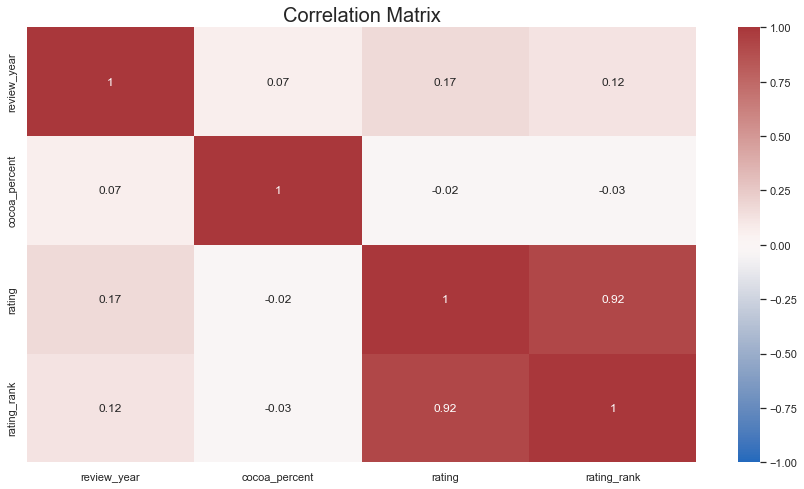

In [44]:
# Correlations
pearson_corr = chocolate_usa_cleaned.corr(method = 'pearson').round(2)

# create figure
plt.figure(figsize = (15, 8))

# Customize title
plt.title("Correlation Matrix", fontsize = 20)

# Create heatmap of correlations
sns.heatmap(pearson_corr, annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'vlag')

# display chart
plt.show()

**Conclusions**
* No numeric features are highly correlated to rating

### Step 7: Cocoa percent to Ingredients by Rating Rank

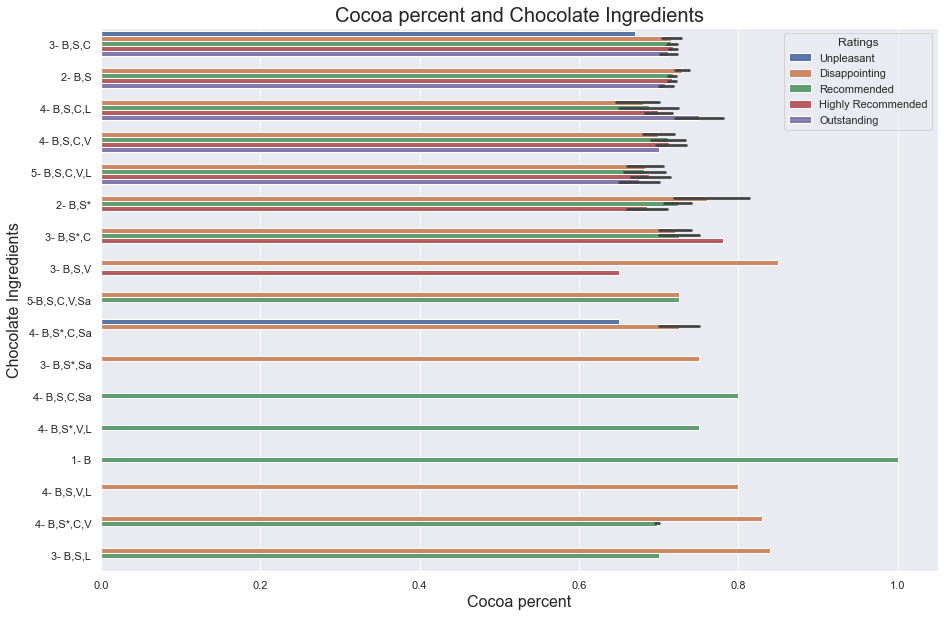

In [45]:
# bar graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x = 'cocoa_percent', y = 'ingredients', data = chocolate_usa_cleaned, hue = 'rating_rank')
ax.set_xlabel('Cocoa percent', fontsize = 16)
ax.set_ylabel('Chocolate Ingredients', fontsize = 16)
ax.set_title('Cocoa percent and Chocolate Ingredients', fontsize = 20)

hands, labs = ax.get_legend_handles_labels()
plt.legend(handles = hands, labels = ('Unpleasant', 'Disappointing', 'Recommended', 'Highly Recommended', 'Outstanding'), title = 'Ratings')

plt.show()